In [ ]:
# Bonjour pour meilleur lisibilité sur jupyter notebook u can install this package :
# !pip install jupyterthemes
# then change ur theme with this command:  jt -t chesterish
# source: https://github.com/dunovank/jupyter-themes

<center> <h1> Give Me Some Credit | Projet Scoring | Kaggle </h1> </center>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Dataset
- https://www.kaggle.com/c/GiveMeSomeCredit
- https://drive.google.com/drive/u/0/folders/1GTH08mUYYAeZs2EbwqchY6pDyEXwcSNc

In [3]:
ScoringTraining = pd.read_csv('C:/Users/ajabbour/Desktop/projet scoring/resources/ScoringTraining.csv')
ScoringTraining.drop('Unnamed: 0',axis =1,inplace = True)

ScoringTest = pd.read_csv('C:/Users/ajabbour/Desktop/projet scoring/resources/ScoringTest.csv')
ScoringTest.drop('Unnamed: 0',axis =1,inplace = True)

In [4]:
X_ScoringTest = ScoringTest[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

In [7]:
ScoringTraining.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
ScoringTraining.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## I- Phase de prétraitement


#### 1. Retrouver la proportion de défauts. C’est souvent un défi d’atteindre une proportion de 5% de défauts. Utiliser les diagrammes en camembert ou les nuages de points.

In [9]:
dflt = ScoringTraining['SeriousDlqin2yrs'].value_counts()/ScoringTraining.shape[0] *100
print(dflt)

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


array([<AxesSubplot:ylabel='Pie'>], dtype=object)

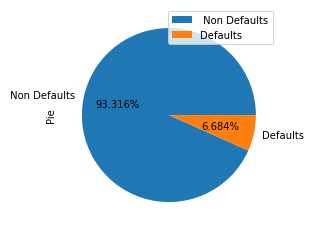

In [10]:
df = pd.DataFrame([93.316,6.684], index=[' Non Defaults', 'Defaults'], columns=['Pie'])
 
df.plot(kind='pie',subplots=True, figsize=(4, 4),autopct='%1.3f%%')

#### 2. Retrouver les données extrêmes (i.e. outliers). Utiliser les boites à moustaches ou l’histogramme.


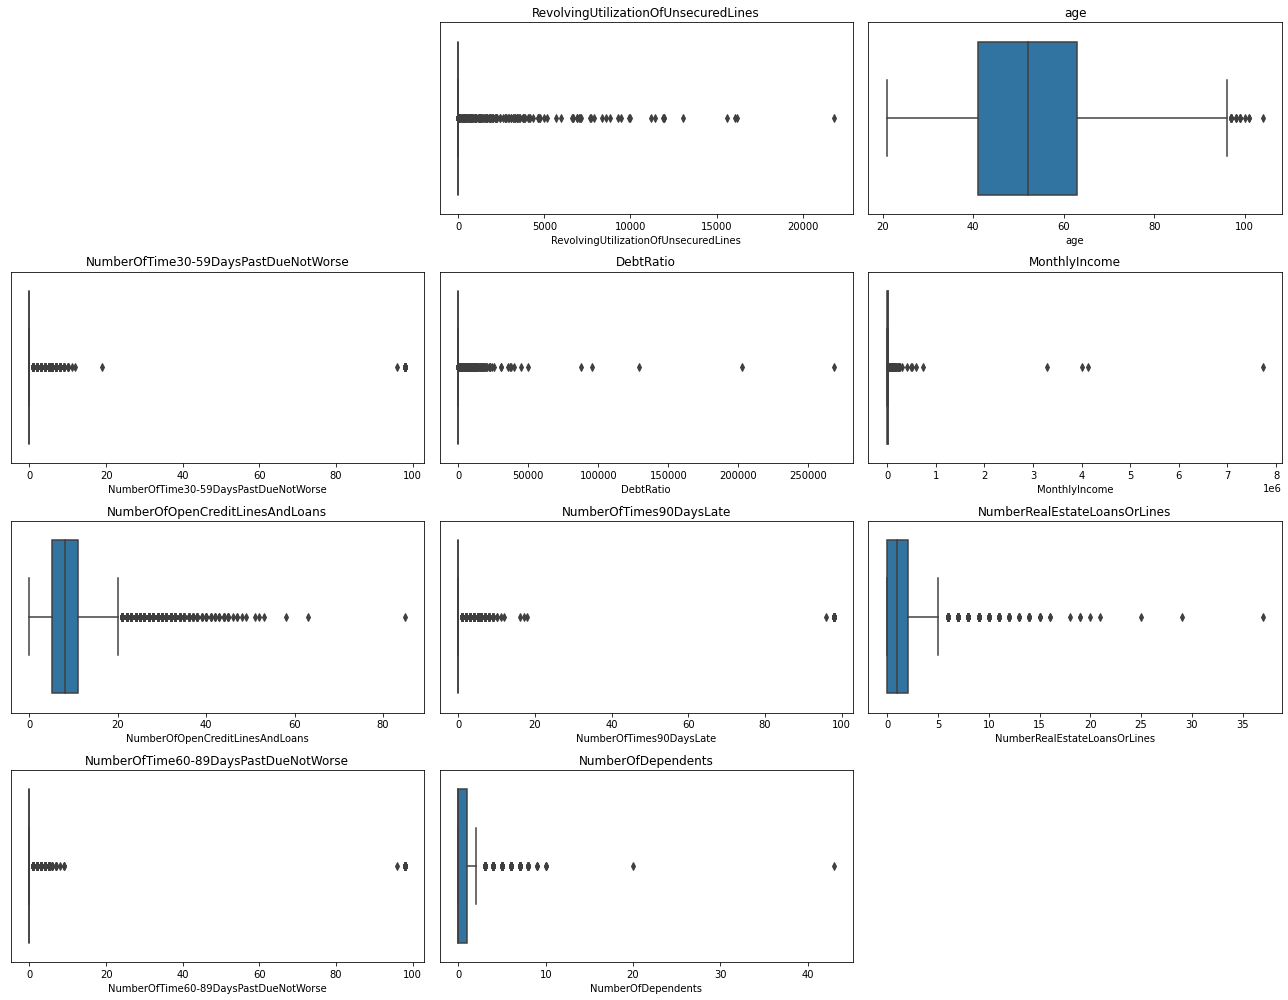

In [11]:
import seaborn as sns

cols = list(ScoringTraining.columns)
cols = cols[0:]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c']

fig1 = plt.figure(figsize=(18, 14))
for i in range(1, len(cols)):
    plt.subplot(4, 3, i+1)
    d = plt.gca()
    d.axes.get_yaxis().set_visible(False)

    sns.boxplot(x=X_ScoringTest[cols[i]])
    plt.title(cols[i])
plt.tight_layout()


#### 3. Retrouver les valeurs manquantes. Utiliser des fonctions de visualisation telles que le missmap() du package Amelia. (version python)



<AxesSubplot:>

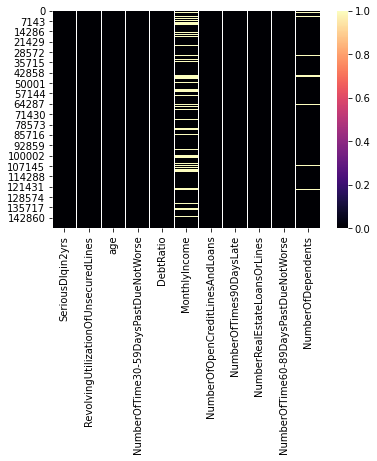

In [12]:
missv = ScoringTraining.isna()
sns.heatmap(missv, cmap='magma')

#### 4. Décider de la manière de gérer ces cas.

###### 4.1 missing values

In [13]:
# fonction pour calculer les valeurs manquants dans chaque colonne
def missing_vals(data_):
    miss_     = data_.isnull().sum()
    miss_pct  = data_.isnull().sum()/data_.shape[0]
    
    miss_pct  = pd.concat([miss_, miss_pct], axis =1)
    miss_pct.reset_index(inplace=True)
    miss_cols = miss_pct.rename(columns={'index':'Column Name', 0:'Missings', 1:'Missing_pct'})
    
    miss_cols = miss_cols[miss_cols.iloc[:,1]!=0].sort_values('Missing_pct', ascending=False).round(1)
    miss_cols.reset_index(inplace=True, drop=True)
    
    return miss_cols 
miss = missing_vals(X_ScoringTest)
miss


,Column Name,Missings,Missing_pct
0,MonthlyIncome,20103,0.2
1,NumberOfDependents,2626,0.0


In [14]:
# Remplacement de valeurs manquants par le moyenne des ses données [column].mean()
ScoringTraining['MonthlyIncome'] =ScoringTraining['MonthlyIncome'].transform(lambda x: x.fillna(x.mean()))
ScoringTraining['NumberOfDependents'] =ScoringTraining['NumberOfDependents'].transform(lambda x: x.fillna(x.mean()))

X_ScoringTest['MonthlyIncome'] =X_ScoringTest['MonthlyIncome'].transform(lambda x: x.fillna(x.mean()))
X_ScoringTest['NumberOfDependents'] =X_ScoringTest['NumberOfDependents'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-14-0b523da78f81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ScoringTest['MonthlyIncome'] =X_ScoringTest['MonthlyIncome'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-14-0b523da78f81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ScoringTest['NumberOfDependents'] =X_ScoringTest['NumberOfDependents'].transform(lambda x: x.fillna(x.mean()))


###### 4.2 Outliers

In [15]:
X_ScoringTest.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
g1_columns = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio', 'MonthlyIncome',
            'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines','NumberOfDependents']

In [17]:
for i in range(0, len(g1_columns)):
    # Training data
    Q1=ScoringTraining[g1_columns[i]].quantile(0.25)   
    Q3=ScoringTraining[g1_columns[i]].quantile(0.75)
    # Testing data
    Qs1=X_ScoringTest[g1_columns[i]].quantile(0.25)   
    Qs3=X_ScoringTest[g1_columns[i]].quantile(0.75)
    
    IQR1=Q3-Q1    # IQR of Training data
    IQR2=Qs3-Qs1  # IQR of Testing data
    
    Lower_WhiskerT = Q1 - 1.5 * IQR1 # Whiskers of Training data
    Upper_WhiskerT = Q3 + 1.5 * IQR1
    
    Lower_WhiskerS = Qs1 - 1.5 * IQR2 # Whiskers of Testing data
    Upper_WhiskerS = Qs3 + 1.5 * IQR2

    ScoringTraining = ScoringTraining[ScoringTraining[g1_columns[i]]< Upper_WhiskerT] # Removing outliers from Training data
    X_ScoringTest = X_ScoringTest[X_ScoringTest[g1_columns[i]]< Upper_WhiskerS] # Removing outliers from Training data



In [18]:
# [NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse] outliers
def replace98and96(column):
    new = []
    newval = column.median()
    for i in column:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

ScoringTraining['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(ScoringTraining['NumberOfTime30-59DaysPastDueNotWorse'])
ScoringTraining['NumberOfTimes90DaysLate'] = replace98and96(ScoringTraining['NumberOfTimes90DaysLate'])
ScoringTraining['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(ScoringTraining['NumberOfTime60-89DaysPastDueNotWorse'])

X_ScoringTest['NumberOfTime30-59DaysPastDueNotWorse'] = replace98and96(X_ScoringTest['NumberOfTime30-59DaysPastDueNotWorse'])
X_ScoringTest['NumberOfTimes90DaysLate'] = replace98and96(X_ScoringTest['NumberOfTimes90DaysLate'])
X_ScoringTest['NumberOfTime60-89DaysPastDueNotWorse'] = replace98and96(X_ScoringTest['NumberOfTime60-89DaysPastDueNotWorse'])

In [20]:
# Age outlier : 0 removal
Q1=ScoringTraining['age'].quantile(0.25)
Q3=ScoringTraining['age'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 * IQR
ScoringTraining = ScoringTraining[ScoringTraining['age'] > Lower_Whisker]

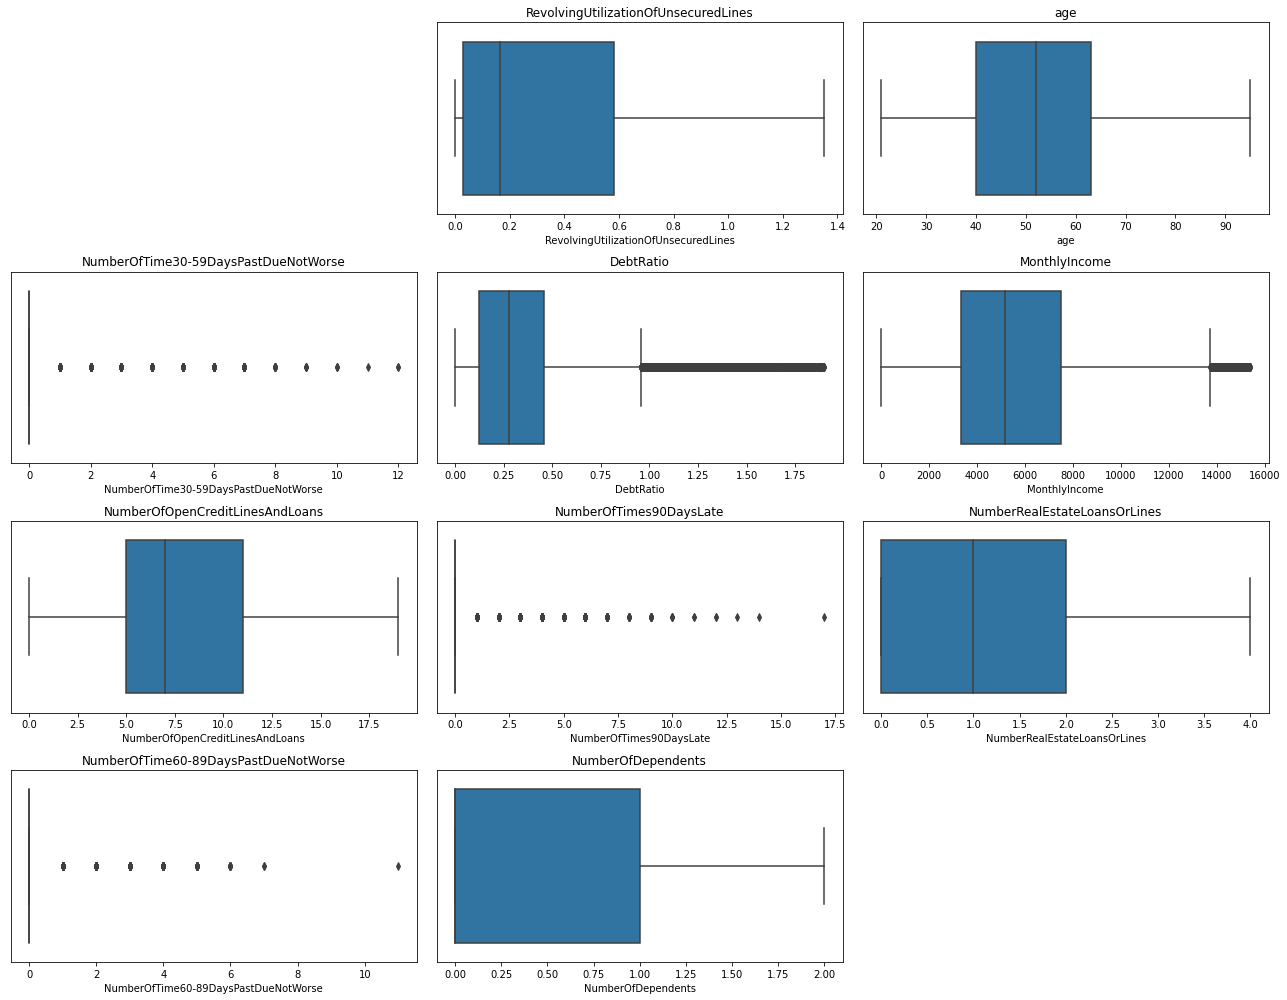

In [21]:
# box plots after performing outlier elemination with the IQR Score 
fig2 = plt.figure(figsize=(18, 14))
for i in range(1, len(cols)):
    plt.subplot(4, 3, i+1)
    d = plt.gca()
    d.axes.get_yaxis().set_visible(False)

    sns.boxplot(x=ScoringTraining[cols[i]])
    plt.title(cols[i])
plt.tight_layout()


#### 5. Afin d’équilibrer les données, choisir des échantillons - de training et de test - dont la classe « 0»est de taille égale à la taille de la classe « 1 » (down-sampling).

Original dataset shape Counter({0: 91555, 1: 6465})
Resampled dataset shape Counter({0: 6465, 1: 6465}) (12930, 10) (12930,)


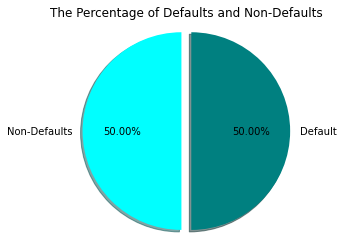

In [85]:
from collections import Counter
from imblearn.under_sampling import NearMiss 
 
# on a utilisé le NearMiss pour performé le (down- sampling)

# Training data
yi= ScoringTraining['SeriousDlqin2yrs']#.to_numpy()
Xi = ScoringTraining[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]#.to_numpy()    

print('Original dataset shape %s' % Counter(yi))
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(Xi, yi)
print('Resampled dataset shape %s' % Counter(y_nm),X_nm.shape,y_nm.shape)



# plot of defaults/non-defaults after balancing the data
trainData = pd.concat([pd.DataFrame(y_nm, columns=[ScoringTraining.columns[0]]),
                  pd.DataFrame(X_nm, columns=ScoringTraining.columns[1:])], axis=1)
labels = 'Non-Defaults', 'Default'
sizes = trainData['SeriousDlqin2yrs'].value_counts()
explode = (0.1, 0)
cols    = ['#00FFFF', '#008080']
fig = plt.figure(figsize = (4,4))
plt.pie(sizes,explode=explode,colors = cols,labels=labels,autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt. title("The Percentage of Defaults and Non-Defaults")
plt.show()

In [23]:
# Resampling of Testing data Note that we don't have y_test that's why we're gonna use yi to resample  
X_ScTest , y_empty =  nm.fit_resample(X_ScoringTest, yi[:len(X_ScoringTest)])
print('Resampled dataset shape %s' % Counter(y_empty),X_ScTest.shape,y_empty.shape)


Resampled dataset shape Counter({0: 4372, 1: 4372}) (8744, 10) (8744,)


#### 6. Meilleur predicteurs  identifier les meilleures variables dans le modèle de prédiction.

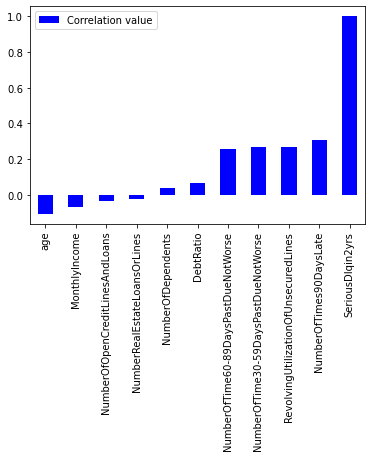

In [196]:
correlations = pd.DataFrame(ScoringTraining.corr()['SeriousDlqin2yrs'].sort_values())
correlations = correlations.rename(columns = {'SeriousDlqin2yrs':'Correlation value'})
correlations.plot(kind="bar", color="blue")


[Text(0.5, 0, 'Correlation with SeriousDlqin2yrs'), Text(0, 0.5, '')]

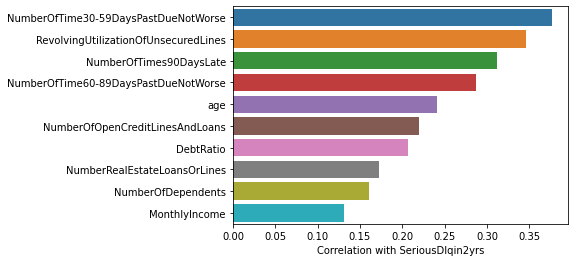

In [86]:
importantFeatures = trainData.corr().SeriousDlqin2yrs
importantFeatures = importantFeatures.reset_index(inplace=False).sort_values('SeriousDlqin2yrs', ascending=False)
sns.barplot(y=importantFeatures['index'][1:], x=importantFeatures.SeriousDlqin2yrs[1:]).set(xlabel='Correlation with SeriousDlqin2yrs', ylabel=None)

## II- Modèle de prévision


#### 7. Appliquer l’AFD. Interpréter 

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
AFD = LinearDiscriminantAnalysis()
afd_object = AFD.fit(X_nm, y_nm)


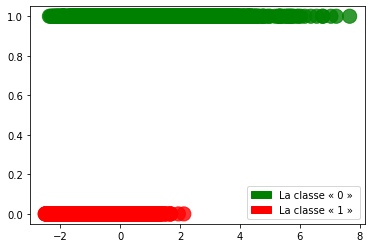

In [26]:
# plt.scatter(X_nm,X_nm*0)
import matplotlib.patches as mpatches
vd = afd_object.transform(X_nm)
axe1 = np.zeros(y_nm.shape)

c = y_nm.map(lambda clr: 'green' if clr == 1  else 'red') # colors code
plt.scatter(vd, y_nm, s=200 ,c=c,alpha=0.8)

red_patch = mpatches.Patch(color='green', label='La classe « 0 » ')
b_patch = mpatches.Patch(color='red', label='La classe « 1 » ')

plt.legend(handles=[red_patch,b_patch])

#### 8. Appliquer le LDA et le QDA après vérification des conditions de chacune.Après avoir choisi une méthode de validation croisée sur les données training :



In [27]:
from sklearn.model_selection import train_test_split
#decouper le data set en 30% pour test et 70% pour train
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.8, random_state=1)

In [29]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict, LeaveOneOut, RepeatedStratifiedKFold

# cv = LeaveOneOut()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)

QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_nm, y_nm)  # QDA_model.fit(X_train, y_train)

LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_nm, y_nm)  # LDA_model.fit(X_train, y_train)


LinearDiscriminantAnalysis()

#### 9. Appliquer la régression logistique seule et avec la fonctionnalité stepwise. Interpréter.
 

In [27]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_nm)
X_scaled = preprocessing.scale(X_nm)

In [70]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=1e5 ,max_iter=500).fit(X_train, y_train)
W = logistic_model.coef_
w0 = logistic_model.intercept_
logistic_model


LogisticRegression(C=100000.0, max_iter=500)

#### 10. Pour extension, il est possible d’appliquer d’autres types de modèles. 


10.1-Nearest neighbors classifier

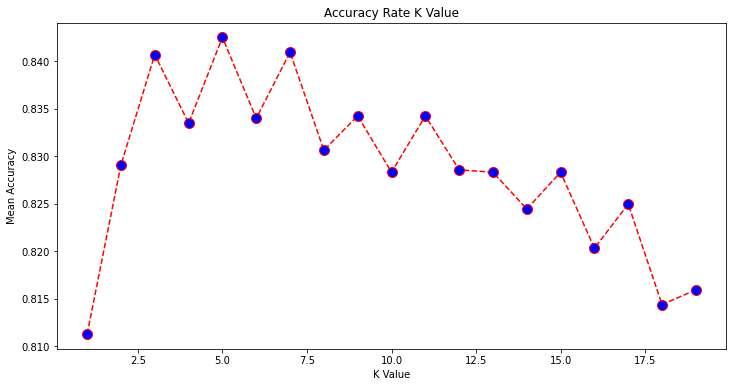

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.3, random_state=1)

accuracy =[]
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(np.mean(pred_i == y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')

#KNN for n_neighbors = 5, c'est le meilleur cas pour l'accuracy le plus grand

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

predicted_y_KNN = KNN.predict(X_test)

10.2- Random  Forest Classifier

In [71]:
# application du random forest classifier
from sklearn.ensemble import RandomForestClassifier

RFS_model = RandomForestClassifier(max_depth=2, random_state=0)
RFS_model.fit(X_nm, y_nm)

RandomForestClassifier(max_depth=2, random_state=0)

10.3-Decision Tree Classifier


In [72]:
from sklearn.tree import DecisionTreeClassifier
DST_model = DecisionTreeClassifier(random_state=0)
DST_model.fit(X_nm, y_nm)

DecisionTreeClassifier(random_state=0)

10.4-Support Vector Classifier

In [73]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_model = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
SVM_model.fit(X_nm, y_nm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

10.5-Gaussian process classification (GPC) based on Laplace approximation. 

In [74]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


# we used a small dataset in this model because it has big runtime il prend beacoup de temps 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_nm, y_nm, test_size=0.9, random_state=1)

kernel = 1.0 * RBF(1.0)
GPC_model = GaussianProcessClassifier(kernel=kernel,random_state=0)
GPC_model.fit(X_train2, y_train2)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)

##  III- Phase d’évaluation et règle de décision retenue


###### III-1.Goodness of fit 

In [46]:
from sklearn.model_selection import cross_val_score

# les scores des des differents models
LDA_scores = cross_val_score(LDA_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
QDA_scores = cross_val_score(QDA_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
logistic_scores = cross_val_score(logistic_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
KNN_scores = cross_val_score(KNN, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
RFS_scores = cross_val_score(RFS_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
DST_scores = cross_val_score(DST_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
SVM_scores = cross_val_score(SVM_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)
# GPC_scores = cross_val_score(GPC_model, X_nm, y_nm, scoring='accuracy', cv=cv, n_jobs=-1)

print('LDA model Mean Accuracy: %.3f (%.3f)' % (np.mean(LDA_scores), np.std(LDA_scores)))
print('QDA model Mean Accuracy: %.3f (%.3f)' % (np.mean(QDA_scores), np.std(QDA_scores)))
print('logistic regression model Mean Accuracy: %.3f (%.3f)' % (np.mean(logistic_scores), np.std(logistic_scores)))
print('KNN model Mean Accuracy: %.3f (%.3f)' % (np.mean(KNN_scores), np.std(KNN_scores)))
print('Random Forest model Mean Accuracy: %.3f (%.3f)' % (np.mean(RFS_scores), np.std(RFS_scores)))
print('Decision Tree model Mean Accuracy: %.3f (%.3f)' % (np.mean(DST_scores), np.std(DST_scores)))
print('Support Vector model Mean Accuracy: %.3f (%.3f)' % (np.mean(SVM_scores), np.std(SVM_scores)))
print('Gaussian process model Mean Accuracy: %.3f (%.3f) ' % (np.mean(GPC_scores), np.std(GPC_scores)))


LDA model Mean Accuracy: 0.771 (0.001)
QDA model Mean Accuracy: 0.766 (0.003)
logistic regression model Mean Accuracy: 0.779 (0.012)
KNN model Mean Accuracy: 0.843 (0.004)
Random Forest model Mean Accuracy: 0.757 (0.005)
Decision Tree model Mean Accuracy: 0.770 (0.007)
Support Vector model Mean Accuracy: 0.810 (0.003)
Gaussian process model Mean Accuracy: nan (nan) 


In [120]:
# y predit de chaque modèle , il peut prendre de temps pour l'execution 
# C'est preferable d'executer une ligne chaque fois

yhatD = cross_val_predict(LDA_model, X_nm, y_nm, groups=None, cv=cv, n_jobs=-1, method='predict')
yhatQ = cross_val_predict(QDA_model, X_nm, y_nm, groups=None, cv=cv, n_jobs=-1, method='predict')
yhatLg = cross_val_predict(logistic_model, X_nm, y_nm, groups=None, cv=cv, n_jobs=-4, method='predict')
yhatKN = cross_val_predict(KNN, X_nm, y_nm, groups=None, cv=cv, n_jobs=-4, method='predict')
yhatRF = cross_val_predict(RFS_model, X_nm, y_nm, groups=None, cv=cv, n_jobs=-4, method='predict')
yhatDT = cross_val_predict(DST_model, X_nm, y_nm, groups=None, cv=cv, n_jobs=-4, method='predict')
yhatSV = SVM_model.predict(X_nm) # ces deux dernier modele prend beacoup de temps avec la vadidation croisée
yhatGP = GPC_model.predict(X_nm)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

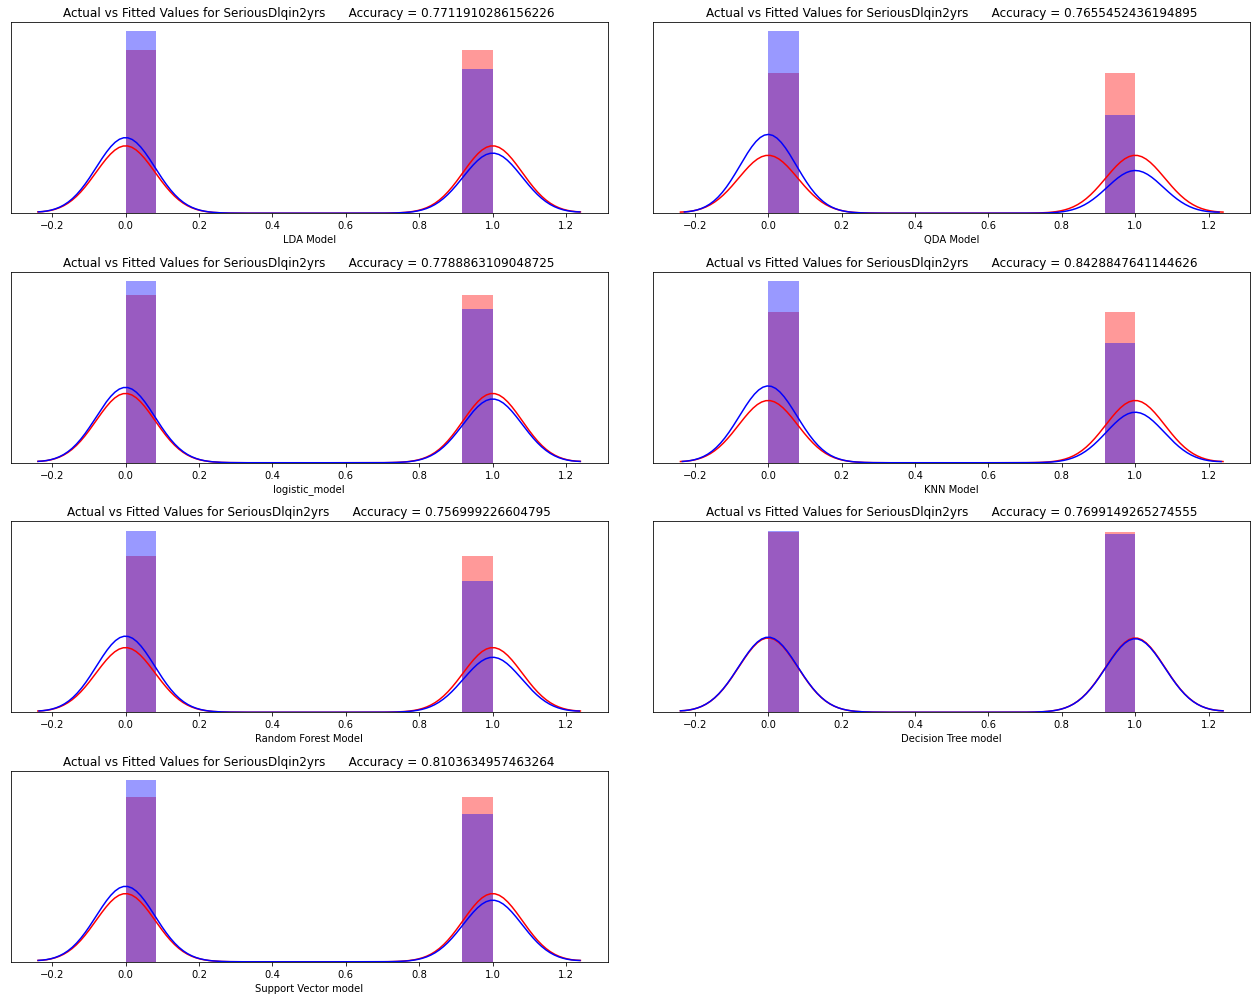

In [168]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# comparaison entre y_true et y_predit aves les differents modeles.
Yhats = {'LDA Model': yhatD, 'QDA Model': yhatQ, 'logistic_model':yhatLg,
         'KNN Model': yhatKN, 'Random Forest Model':yhatRF, 'Decision Tree model':yhatDT, 
          'Support Vector model':yhatSV}
acc = [LDA_scores, QDA_scores, logistic_scores, KNN_scores, RFS_scores, DST_scores, SVM_scores]
accuracies = list(map(lambda x: np.mean(x), acc))

fig3 = plt.figure(figsize=(18, 14))
for i in range(0, len(Yhats)):
    plt.subplot(4, 2, i+1)
    d = plt.gca()
    d.axes.get_yaxis().set_visible(False)
    
    ax1 = sns.distplot(y_nm, hist=True, color="r", label="Actual Value")
    sns.distplot(list(Yhats.values())[i], hist=True, color="b", label="Fitted Values" , ax=ax1)
    plt.title('Actual vs Fitted Values for SeriousDlqin2yrs      Accuracy = '+ str(accuracies[i]))
    plt.xlabel(list(Yhats)[i])
    
plt.tight_layout()


###### III-2.Pouvoir de prédiction 

In [75]:
# scores / posterior probabilites des models
S_LDA = LDA_model.predict_proba(X_ScTest)[:,1]      # Linear discriminant analysis
S_QDA = QDA_model.predict_proba(X_ScTest)[:,1]      # Quadratic discriminant analysis
S_LGR = logistic_model.predict_proba(X_ScTest)[:,1] # la regression logistique
S_KNN = KNN.predict_proba(X_ScTest)[:,1]            # Nearest neighbor 
S_RFS = RFS_model.predict_proba(X_ScTest)[:,1]      # Random forest
S_DST = DST_model.predict_proba(X_ScTest)[:,1]      # Decision tree
S_SVM = SVM_model.predict_proba(X_ScTest)[:,1]      # Support vector 
S_GPC = GPC_model.predict_proba(X_ScTest)[:,1]      # Gaussian process 

In [76]:
from sklearn import metrics

# calcul des taux vrais positives tpr , fpr et treshold pour chaque model
fprL, tprL, thresholdsL = metrics.roc_curve(y_empty, S_LDA ,pos_label=0,
                                            drop_intermediate=False)
fprQ, tprQ, thresholdsQ = metrics.roc_curve(y_empty, S_QDA, pos_label=0,
                                            drop_intermediate=False)
fprR, tprR, thresholdsR = metrics.roc_curve(y_empty, S_LGR, pos_label=1,
                                            drop_intermediate=False)
fprN, tprN, thresholdsN = metrics.roc_curve(y_empty, S_KNN, pos_label=0,
                                            drop_intermediate=False)
fprF, tprF, thresholdsF = metrics.roc_curve(y_empty, S_RFS, pos_label=0,
                                            drop_intermediate=False)
fprD, tprD, thresholdsD = metrics.roc_curve(y_empty, S_DST, pos_label=0,
                                            drop_intermediate=False)
fprV, tprV, thresholdsV = metrics.roc_curve(y_empty, S_SVM, pos_label=0,
                                            drop_intermediate=False)
fprG, tprG, thresholdsG = metrics.roc_curve(y_empty, S_GPC, pos_label=0,
                                            drop_intermediate=False)
fpr =[fprL,fprQ,fprR,fprN,fprF,fprD,fprV,fprG] # list des fpr des models
tpr =[tprL,tprQ,tprR,tprN,tprF,tprD,tprV,tprG] # list des tpr des models
thresholds=[thresholdsL,thresholdsQ,thresholdsR,thresholdsN,thresholdsF,thresholdsD,thresholdsV,thresholdsG]

LDA Model
QDA Model
logistic_model
KNN Model
Random Forest Model
Decision Tree model
Support Vector model


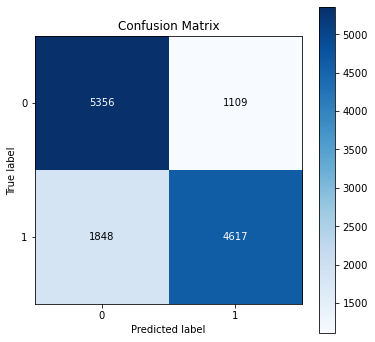

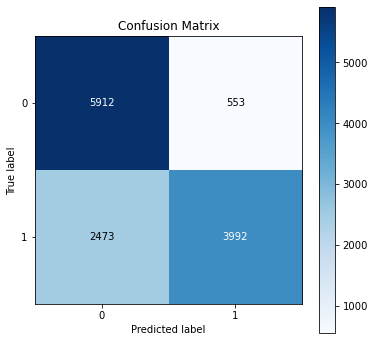

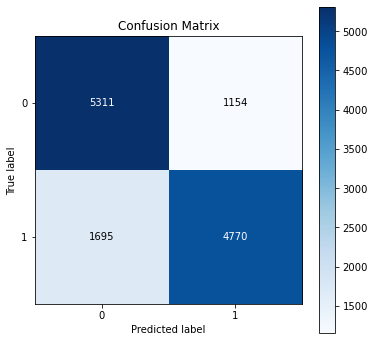

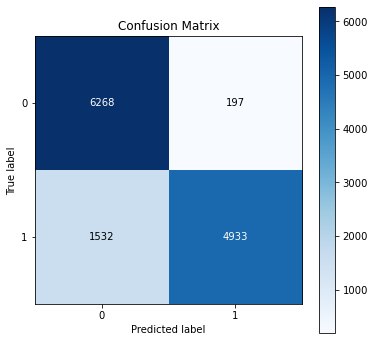

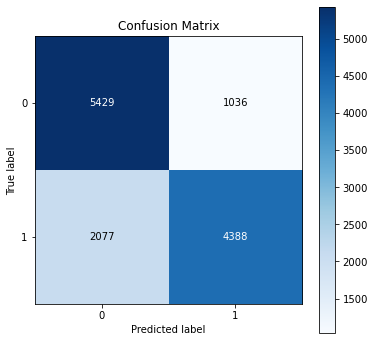

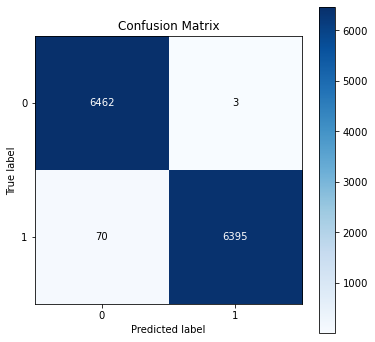

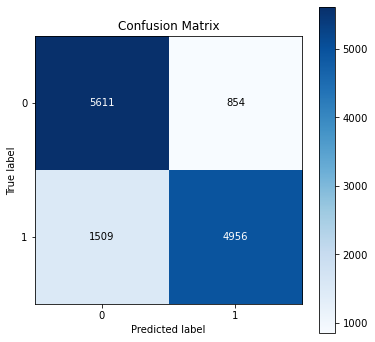

In [175]:
#create consusion matrix and plot
# svp installer scikitplot avant d'executer se code : !pip install scikitplot

import scikitplot as skplt
for i in range(len(Yhats)):
    yh = list(Yhats.values())[i].reshape(12930,1)
    print(list(Yhats)[i])
    skplt.metrics.plot_confusion_matrix(y_nm,yh,figsize=(6,6))

  Une fonction pour présenter le graphe ROC

In [64]:
from matplotlib import pyplot
import matplotlib.collections
import numbers
import numpy
import six



def colorline(x, y, z=None, axes=None,
              cmap=pyplot.get_cmap('coolwarm'),
              norm=pyplot.Normalize(0.0, 1.0), linewidth=3, alpha=1.0,
              **kwargs):

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = numpy.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if isinstance(z, numbers.Real):
        z = numpy.array([z])

    z = numpy.asarray(z)

    segments = make_segments(x, y)
    lc = matplotlib.collections.LineCollection(
        segments, array=z, cmap=cmap, norm=norm,
        linewidth=linewidth, alpha=alpha, **kwargs
    )

    if axes is None:
        axes = pyplot.gca()

    axes.add_collection(lc)
    axes.autoscale()

    return lc
def make_segments(x, y):

    points = numpy.array([x, y]).T.reshape(-1, 1, 2)
    segments = numpy.concatenate([points[:-1], points[1:]], axis=1)

    return segments

def plot_roc(tpr, fpr, thresholds,
             label_every=None,
             label_kwargs=None,
             fpr_label='False Positive Rate',
             tpr_label='True Positive Rate',
             title='Receiver operating characteristic',
             **kwargs):

    subplots_kwargs = {}

    figure, axes = pyplot.subplots(1, 1, **subplots_kwargs)

    if 'lw' not in kwargs:
        kwargs['lw'] = 1

    axes.plot(fpr, tpr, **kwargs)

    if label_every is not None:
        if label_kwargs is None:
            label_kwargs = {}

        if 'bbox' not in label_kwargs:
            label_kwargs['bbox'] = dict(
                boxstyle='round,pad=0.5', fc='yellow', alpha=0.5,
            )

        for k in six.moves.range(len(tpr)):
            if k % label_every != 0:
                continue

            threshold = str(np.round(thresholds[k], 2))
            x = fpr[k]
            y = tpr[k]
            axes.annotate(threshold, (x, y), **label_kwargs)

    

    lc = colorline(fpr, tpr, thresholds, axes=axes)
    figure.colorbar(lc)

    axes.set_xlim([-0.05, 1.05])
    axes.set_ylim([-0.05, 1.05])

    axes.set_xlabel(fpr_label)
    axes.set_ylabel(tpr_label)

    axes.set_title(title)

    return figure, axes

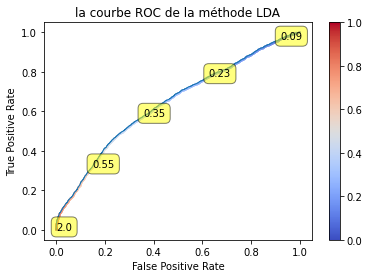

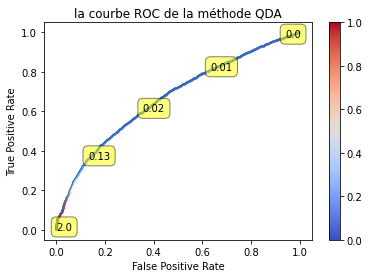

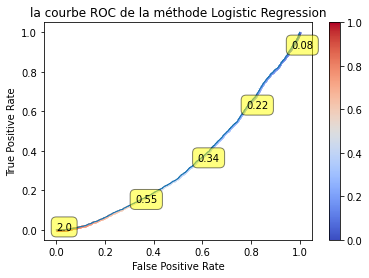

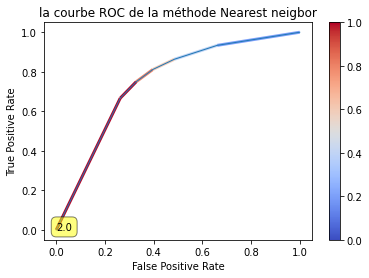

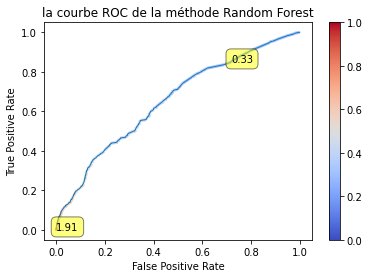

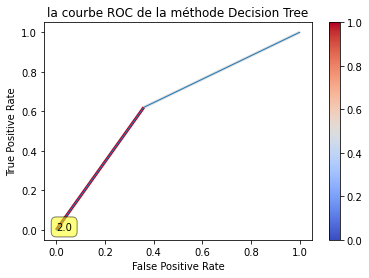

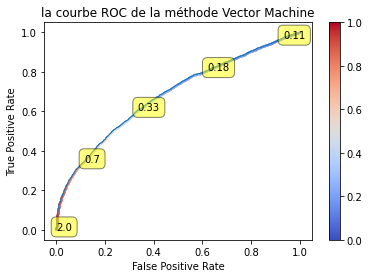

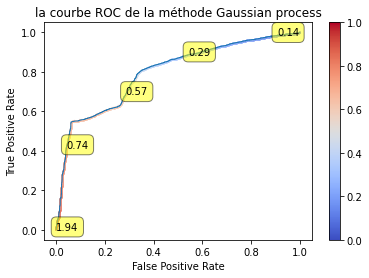

In [77]:
# plot the ROC graph for each model
titles = ['LDA','QDA','Logistic Regression','Nearest neigbor','Random Forest','Decision Tree','Vector Machine','Gaussian process']
for i in range(8) :
    plot_roc(fpr[i], tpr[i], thresholds[i], 
             label_every=2000, label_kwargs=None,
             fpr_label='False Positive Rate',
             tpr_label='True Positive Rate',
             title='la courbe ROC de la méthode ' +str(titles[i]) )

In [178]:
# calcule de critère AUC pour les modèles
from sklearn import metrics

AUC_LDA = metrics.auc(tprL,fprL)
AUC_QDA = metrics.auc(tprQ,fprQ)
AUC_LGR = metrics.auc(tprR,fprR)
AUC_KNN = metrics.auc(tprN,fprN)
AUC_RFS = metrics.auc(tprF,fprF)
AUC_DST = metrics.auc(tprD,fprD)
AUC_SVM = metrics.auc(tprV,fprV)
AUC_GPC = metrics.auc(tprG,fprG)


print("le critére AUC pour la méthode LDA, LDA_AUC = ",AUC_LDA)
print("le critére AUC pour la méthode QDA, QDA_AUC = ",AUC_QDA)
print("le critére AUC pour la méthode Logistic Regression, LgRg_AUC = ",AUC_LGR)
print("le critére AUC pour la méthode KNN, KNN_AUC = ",AUC_KNN)
print("le critére AUC pour la méthode Random Forest, RFS_AUC = ",AUC_RFS)
print("le critére AUC pour la méthode Decision Tree, DST_AUC = ",AUC_DST)
print("le critére AUC pour la méthode Support vector machine, SVM_AUC = ",AUC_SVM)
print("le critére AUC pour la méthode Gaussian process , GPC_AUC = ",AUC_GPC)


le critére AUC pour la méthode LDA, LDA_AUC =  0.6438346639891717
le critére AUC pour la méthode QDA, QDA_AUC =  0.6703792285432792
le critére AUC pour la méthode Logistic Regression, LgRg_AUC =  0.34598237641349056
le critére AUC pour la méthode KNN, KNN_AUC =  0.7472101115055552
le critére AUC pour la méthode Random Forest, RFS_AUC =  0.650905647809524
le critére AUC pour la méthode Decision Tree, DST_AUC =  0.6302016324460156
le critére AUC pour la méthode Support vector machine, SVM_AUC =  0.682953790192768
le critére AUC pour la méthode Gaussian process , GPC_AUC =  0.7965828770626352


#### 12. Choisir le modèle le plus performant. 
 

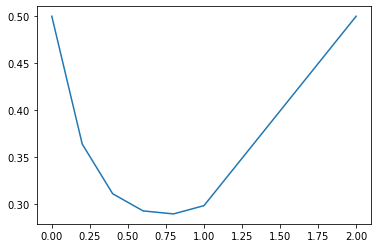

In [204]:
accuracies2 = []
for threshold in thresholdsN:
    y_pr2 = np.greater(threshold, S_KNN )#.astype(int)
    accuracy2 = roc_auc_score(y_empty, y_pr2, labels=['0','1'])
    accuracies2.append(accuracy2)
    
plt.plot(thresholdsN,accuracies2)

Extension : Neural Network classifier (out of subject just for testing)

In [53]:
# ressources : https://keras.io/api/models/model/
#              https://www.tutorialspoint.com/keras/keras_model_compilation.htm

# Tensorflow required 
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.3, random_state=1)

n_inputs = X_nm.shape[1]

Neural_model = models.Sequential()
Neural_model.add(layers.Dense(16, activation ='relu', input_shape =(n_inputs, )))
Neural_model.add(layers.Dense(32,activation = 'relu'))
Neural_model.add(layers.Dense(1,activation ='sigmoid'))

Neural_model.compile(optimizer = 'adamax', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [58]:
#fitting the model
DL_model = Neural_model.fit(X_train, y_train, epochs=200, batch_size=200, validation_data=(X_test,y_test))

Epoch 1/200
46/46 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7673 - val_loss: 0.4422 - val_accuracy: 0.7914
Epoch 2/200
46/46 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7802 - val_loss: 0.4559 - val_accuracy: 0.7858
Epoch 3/200
46/46 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7549 - val_loss: 0.4380 - val_accuracy: 0.7943
Epoch 4/200
46/46 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7701 - val_loss: 0.7294 - val_accuracy: 0.7123
Epoch 5/200
46/46 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7484 - val_loss: 0.6846 - val_accuracy: 0.6803
Epoch 6/200
46/46 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7336 - val_loss: 0.5117 - val_accuracy: 0.7381
Epoch 7/200
46/46 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7668 - val_loss: 0.4845 - val_accuracy: 0.7535
Epoch 8/200
4

In [59]:
Neural_model_Accuracy = Neural_model.evaluate(X_test, y_test)
# meilleur resultat obtenu loss: 0.4383 - accuracy: 0.7953

122/122 [==============================] - 0s 621us/step - loss: 0.4383 - accuracy: 0.7953


In [80]:
# AUC score
from sklearn import metrics

yhatNR  = Neural_model.predict(X_test)
fprNR, tprNR, thresholdsNR = metrics.roc_curve(y_test, yhatNR)
roc_auc = metrics.auc(fprNR, tprNR)
print("AUC score of the Neural Network model is ", roc_auc)


AUC score of the Neural Network model is  0.8783527155380748


AUC score of the Neural Network model is =  0.8783527155380748 <br>
Best score so far